# Exploratory Data Analysis of Video Game Sales and the Console Wars

## Brief History of Video Games

Wikipedia defines video game as:<br>
"An electronic game that involves interaction with a user interface to generate visual feedback on a two or three dimensional video display device such as Tv, virtual reality or computer monitor". The 1980s brought about the rise of Video Games thanks to video arcades. With the release of consoles, it caused a decline in Video arcades, since consoles provided a more affordable way to play video games.

### About the Dataset used

This dataset was generated by a scrape of vgchartz.com, and 
can be found on <a href="https://www.kaggle.com/gregorut/videogamesales">Kaggle</a>. This dataset was made by Kaggle User GregorySmith. The dataset contains the sales of Video Games from 1980-2016

In [11]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

VGS = pd.read_csv(r'..vgsales.csv')

In [3]:
VGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


After storing the data into a dataframe, I decided to check out the info about the data so
we can see what we're working with. There is not any null values, so it looks like we're good 
to go. 

# Looking at Global sales yearly

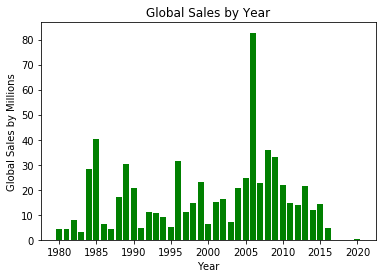

In [14]:
#Line Graph between Global_sales and Year
x = VGS['Year']
y = VGS['Global_Sales']
plt.bar(x,y, color='g')
plt.xlabel('Year')
plt.ylabel('Global Sales by Millions')
plt.title('Global Sales by Year')
plt.show()


1985, 1996, and 2006 caused huge spikes in Global Sales. What were the publishers that had the most sales that year? 

## 1985

In [7]:
Year_1985 = VGS[VGS['Year']==1985]
Year_1985.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
374,375,Kung Fu,NES,1985.0,Action,Nintendo,1.64,0.38,1.42,0.06,3.50
868,870,Soccer,NES,1985.0,Sports,Nintendo,0.18,0.23,1.53,0.02,1.96
1260,1262,Ice Climber,NES,1985.0,Platform,Nintendo,0.46,0.10,0.92,0.02,1.50
1490,1492,Gyromite,NES,1985.0,Puzzle,Nintendo,0.73,0.16,0.40,0.03,1.32
1973,1975,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,Namco Bandai Games,0.00,0.00,1.05,0.00,1.05
2020,2022,Bomberman,NES,1985.0,Puzzle,Hudson Soft,0.18,0.00,0.85,0.00,1.03
2059,2061,1942,NES,1985.0,Shooter,Capcom,0.65,0.14,0.21,0.00,1.00
2259,2261,Balloon Fight,NES,1985.0,Platform,Nintendo,0.39,0.09,0.43,0.01,0.92
3907,3909,Wrecking Crew,NES,1985.0,Platform,Nintendo,0.00,0.00,0.51,0.00,0.51


Since we are only looking at Global Sales, it would make more sense to drop the other Sales columns.

In [51]:
Global_1985 = VGS.drop(VGS.columns[6:10], axis =1)
print(Global_1985.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Global_Sales'],
      dtype='object')


Cool now that we dropped the columns we don't need, lets take a look at what we got left.

In [73]:
Year_1985updated = Global_1985[Global_1985['Year'] == 1985]
Year_1985updated.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
374,375,Kung Fu,NES,1985.0,Action,Nintendo,3.50
868,870,Soccer,NES,1985.0,Sports,Nintendo,1.96
1260,1262,Ice Climber,NES,1985.0,Platform,Nintendo,1.50
1490,1492,Gyromite,NES,1985.0,Puzzle,Nintendo,1.32
1973,1975,Tag Team Match M.U.S.C.L.E.,NES,1985.0,Fighting,Namco Bandai Games,1.05
2020,2022,Bomberman,NES,1985.0,Puzzle,Hudson Soft,1.03
2059,2061,1942,NES,1985.0,Shooter,Capcom,1.00
2259,2261,Balloon Fight,NES,1985.0,Platform,Nintendo,0.92
3907,3909,Wrecking Crew,NES,1985.0,Platform,Nintendo,0.51


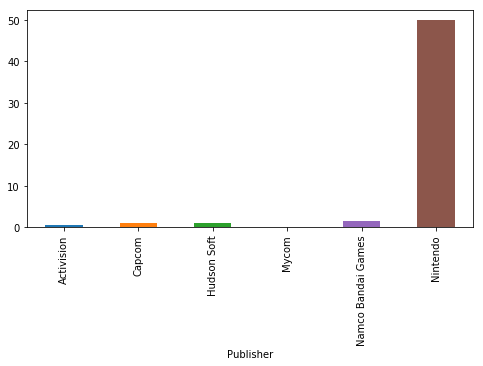

In [59]:
%matplotlib inline
plt.figure(figsize(8,4))
Publisher_1985 = Year_1985updated['Global_Sales'].groupby(Year_1985updated['Publisher'])
Publisher_1985.sum().plot(kind = 'bar')

Wow! Turns out 1985 was a very good year for Nintendo. Nintendo dominated with about 50 million
in sales with games, globally! The remaining publishers barely broke 10 million! 

For context, 1985 was the year the NES was released in American Markets. With the release of the NES 
in the states, it helped revitalize what was the failing video game industry! Let's take a look at the
games that was sold in 1985 and their numbers in the NA market. 

In [23]:
#Creating a new variable and dropping unnecessary columns for this analysis 
NA_1985 = VGS.drop(VGS.columns[7:], axis=1)
NA_1985updated = NA_1985[NA_1985['Year'] == 1985]
NA_1985updated.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
374,375,Kung Fu,NES,1985.0,Action,Nintendo,1.64
868,870,Soccer,NES,1985.0,Sports,Nintendo,0.18
1260,1262,Ice Climber,NES,1985.0,Platform,Nintendo,0.46
1490,1492,Gyromite,NES,1985.0,Puzzle,Nintendo,0.73


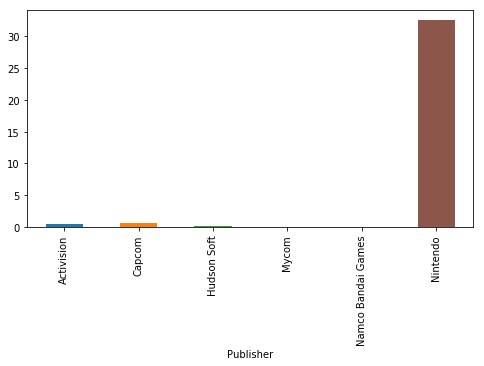

In [24]:
%matplotlib inline
plt.figure(figsize=(8,4))
Games_1985 = NA_1985updated['NA_Sales'].groupby(NA_1985updated['Publisher'])
Games_1985.sum().plot(kind = 'bar')

Wow! Just looking at this, again Nintendo dominated the American Video Gaming industry in terms of sales! Will Nintendo continue to dominate in the next year when game sales spiked up?

## The 1996 Console War: Nintendo vs the world 

In [4]:
Year_1996 = VGS[VGS['Year']==1996]
Year_1996.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
46,47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
63,64,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
116,117,Crash Bandicoot,PS,1996.0,Platform,Sony Computer Entertainment,3.23,2.35,0.94,0.30,6.82
152,153,Tekken 2,PS,1996.0,Fighting,Sony Computer Entertainment,2.26,1.89,1.36,0.23,5.74
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.00,0.20,5.12
201,202,Resident Evil,PS,1996.0,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05
229,230,Tomb Raider,PS,1996.0,Action,Eidos Interactive,2.29,1.97,0.13,0.24,4.63
293,294,Namco Museum Vol.3,PS,1996.0,Misc,Sony Computer Entertainment,2.28,1.55,0.16,0.06,4.05
325,326,Resident Evil Director's Cut,PS,1996.0,Action,Virgin Interactive,1.82,1.24,0.47,0.25,3.77


Above are the top 10 games in 1996! Nintendo now has a bit more competitors in the platform market! Let's take a look now at the platforms that are now competing against Nintendo. 

In [5]:
Year_1996['Platform'].value_counts()

PS      164
SAT      38
SNES     30
N64      18
GB        6
PC        4
NG        2
PCFX      1
Name: Platform, dtype: int64

Wow, Nintendo now has 5 new competitors in the market! It seems like the Playstation has the most releases in terms of games, followed by the Sega Saturn, then the 3 Nintendo platforms. Did the Playstation dominate in Global Sales though? 

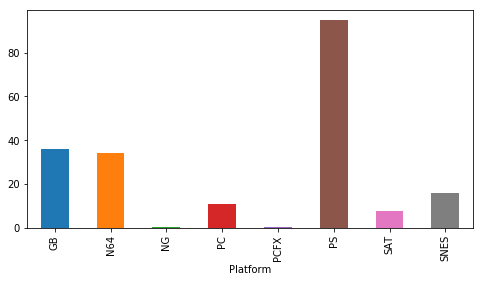

In [17]:
%matplotlib inline
plt.figure(figsize=(8,4))
Publisher_1996 = Year_1996['Global_Sales'].groupby(Year_1996['Platform'])
Publisher_1996.sum().plot(kind = 'bar')

Turns out, yes the Playstation did dominate in Global Sales compared to the total Nintendo had, but regionally such as in North America, would this be the case? 

In [21]:
NA_1996 = VGS.drop(VGS.columns[7:], axis=1)
NA_1996updated = NA_1996[NA_1996['Year'] == 1996]
NA_1996updated.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27
46,47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91
63,64,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55
116,117,Crash Bandicoot,PS,1996.0,Platform,Sony Computer Entertainment,3.23
152,153,Tekken 2,PS,1996.0,Fighting,Sony Computer Entertainment,2.26


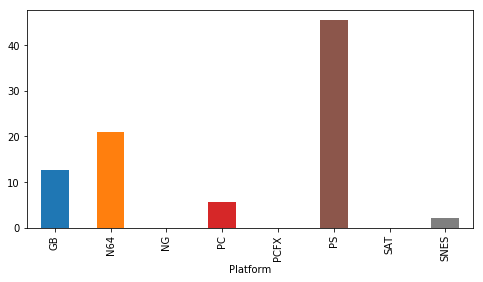

In [26]:
%matplotlib inline
plt.figure(figsize=(8,4))
NAPublisher_1996 = NA_1996updated['NA_Sales'].groupby(NA_1996updated['Platform'])
NAPublisher_1996.sum().plot(kind = 'bar')

Turns out that Nintendo, despite having 3 different consoles out at the time lost the console war in 1996. The Playstation, which was released in 1994, by the time 1996 hit they've had more sales than any of the Publishers who released any consoles during that time. 

Also, for a fun fact: the SAT (Sega Saturn)'s failure marked the end of Sega's time in the console business and shifting them from focusing on consoles to being a third-party developer. 

So Playstation ended up winning the console war in 1996 before it technically even began. As mentioned, certain companies bowed out of the console making business to focus more on being more of a third party developer for games. Next we'll be taking a look at the next console war in the next year where video game sales spiked the most: 2006

# The 2006 Console War

In [29]:
Year_2006 = VGS[VGS['Year']==2006]
Year_2006.head(10)
#checking to make sure the information loaded correctly

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
141,142,Gears of War,X360,2006.0,Shooter,Microsoft Game Studios,3.54,1.90,0.07,0.60,6.11
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,1.88,0.00,2.33,1.74,5.95
153,154,Cooking Mama,DS,2006.0,Simulation,505 Games,3.13,1.94,0.07,0.58,5.72
195,196,Guitar Hero II,PS2,2006.0,Misc,RedOctane,3.81,0.63,0.00,0.68,5.12
198,199,Grand Theft Auto: Vice City Stories,PSP,2006.0,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08


In [28]:
Year_2006['Platform'].value_counts()

PS2     259
DS      202
PSP     190
X360     93
XB       62
PC       52
Wii      44
GC       40
GBA      39
PS3      27
Name: Platform, dtype: int64

For reference, 
PS2: PlayStation 2 (Sony)<br>
DS: Nintendo DS (Nintendo)<br>
PSP: Playstation Portable (Sony)<br>
X360: Xbox 360(Microsoft)<br>
XB: Xbox (Microsoft)<br>
PC: PC<br>
Wii: (Nintendo)<br>
Gamecube: (Nintendo)<br>
GBA: Gameboy Advance (Nintendo)<br>
PS3: PlayStation 3 (Sony)<br>

2006 was the first year in what is now known as the 7th generation console wars with the Xbox 360, Wii and the Playstation 3. For this section, I'm going to be focusing on the 7th generation console. So let's get rid of some of the platforms in our data.

Text(0.5,1,'Total Releases per console')

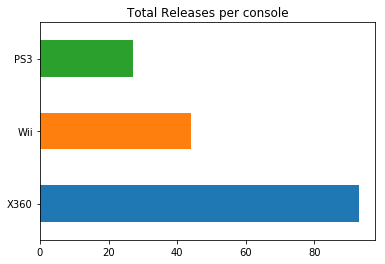

In [42]:
#Will Probably implement a loop later on  
PS2DROP= Year_2006[Year_2006.Platform != 'PS2']
DSDROP = PS2DROP[PS2DROP.Platform != 'DS']
PSPDROP = DSDROP[DSDROP.Platform != 'PSP']
XBDROP = PSPDROP[PSPDROP.Platform != 'XB']
PCDROP = XBDROP[XBDROP.Platform != 'PC']
GCDROP = PCDROP[PCDROP.Platform != 'GC']
DROP7 = GCDROP[GCDROP.Platform != 'GBA']

DROP7['Platform'].value_counts().plot(kind='barh')
plt.title('Total Releases per console')